### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### Velocidades

In [2]:
velocity = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_wind_speeds_manometer.csv')
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00168   
1        0.00007          0.0              0.0  0.0         inf    0.00166   
2        0.00007          0.0              0.0  0.0         inf    0.00168   
3        0.00007          0.0              0.0  0.0         inf    0.00166   
4        0.00007          0.0              0.0  0.0         inf    0.00166   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.27127   0.67119  101325.0  20.0          0.0         inf   
1         inf   1.69845   1.67946  101325.0  20.0          0.0         inf   
2         inf   4.89781   2.85196  101325.0  20.0          0.0         inf   
3         inf  10.10309   4.09609  101325.0  20.0          0.0         inf   
4         inf  16.09979   5.17074  101325.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00171         inf  
1    0.00167         inf  
2    0.00170         inf  
3    0.00169         inf  
4    0.00168         inf

In [3]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.head()

tunnel V
0  0.576418
1  1.442320
2  2.449263
3  3.517722
4  4.440632

In [4]:
vel.iloc[160]

tunnel V    0.611904
Name: 160, dtype: float64

## y-2

Velocity:  0.576417972
Max Frequency value:  78.125


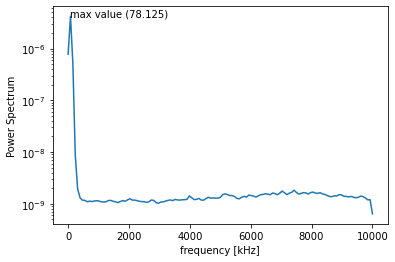


Velocity:  1.442320248
Max Frequency value:  156.25


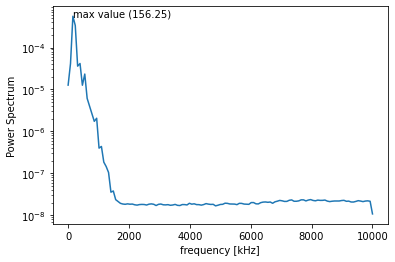


Velocity:  2.4492632480000003
Max Frequency value:  390.625


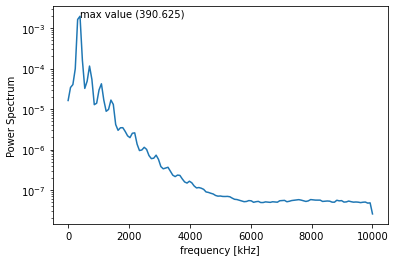


Velocity:  3.517722092
Max Frequency value:  546.875


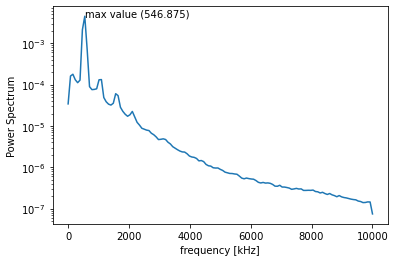


Velocity:  4.440631512
Max Frequency value:  703.125


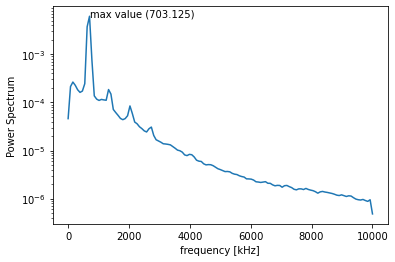


Velocity:  5.4671208
Max Frequency value:  859.375


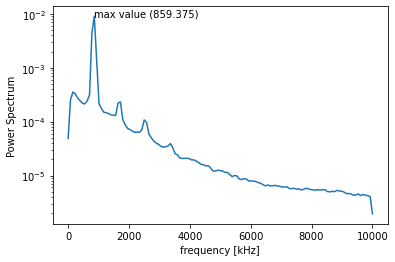


Velocity:  6.5218731960000005
Max Frequency value:  1015.625


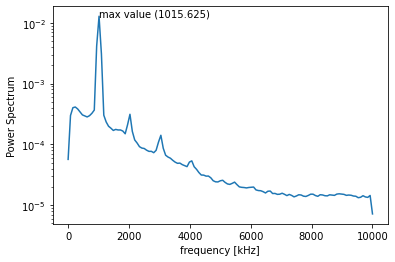


Velocity:  7.444920024
Max Frequency value:  1171.875


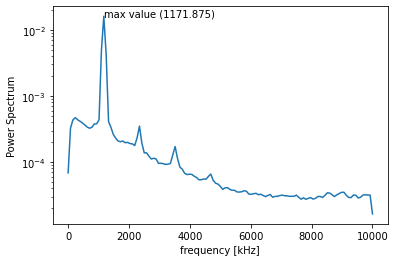


Velocity:  8.48721982
Max Frequency value:  1328.125


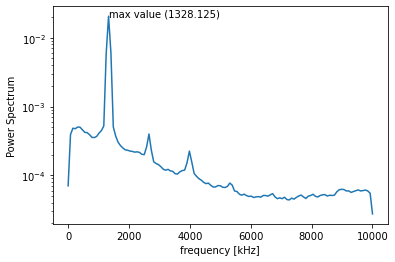


Velocity:  9.459347068000001
Max Frequency value:  1484.375


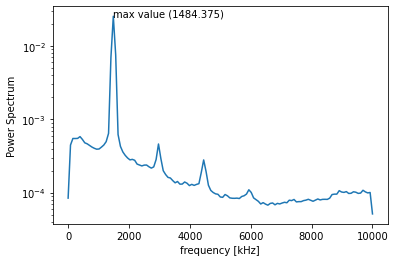


Velocity:  10.454112284
Max Frequency value:  1640.625


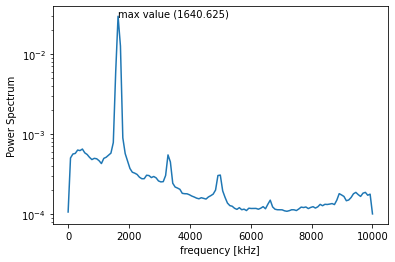


Velocity:  11.528625668
Max Frequency value:  1796.875


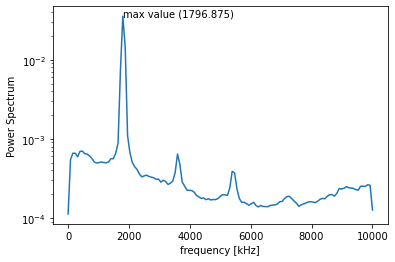


Velocity:  12.444252463999998
Max Frequency value:  1953.125


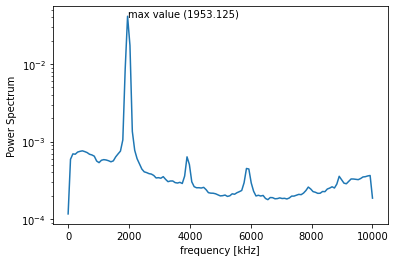


Velocity:  13.505368568000002
Max Frequency value:  2109.375


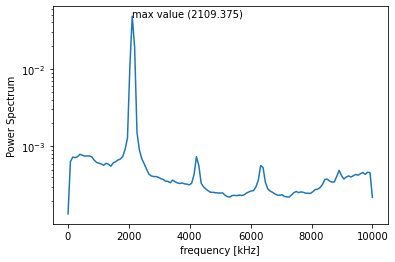


Velocity:  14.503766508
Max Frequency value:  2265.625


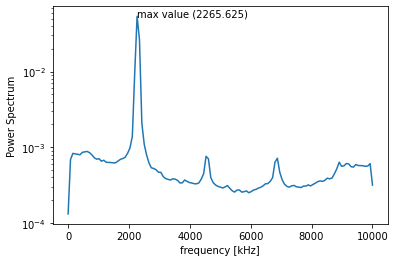


Velocity:  15.441679163999998
Max Frequency value:  2421.875


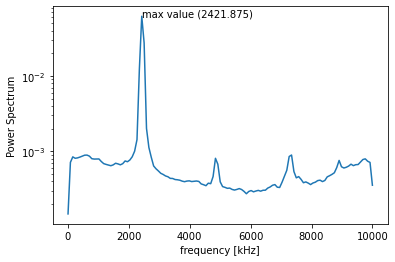

In [5]:
df = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_yminus2.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

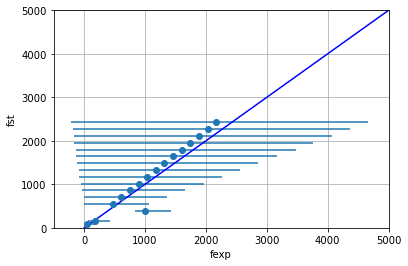

In [6]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.607137248
Max Frequency value:  78.125


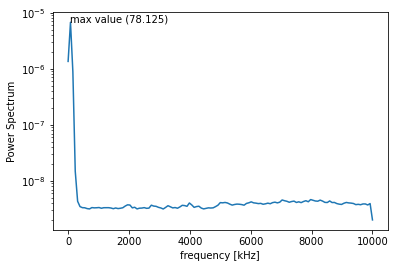


Velocity:  1.464966804
Max Frequency value:  156.25


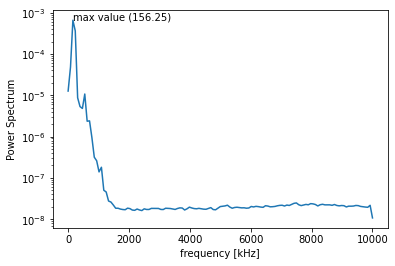


Velocity:  2.5363369799999997
Max Frequency value:  390.625


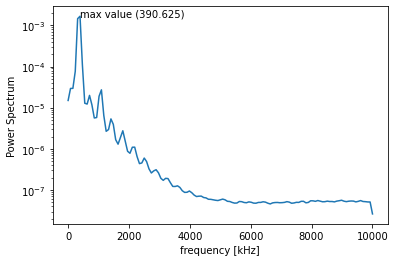


Velocity:  3.584176036
Max Frequency value:  546.875


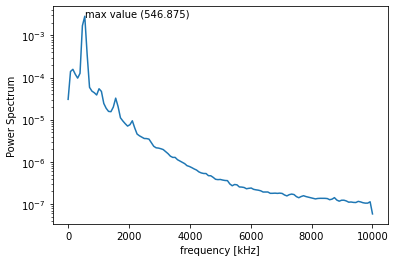


Velocity:  4.4189554
Max Frequency value:  703.125


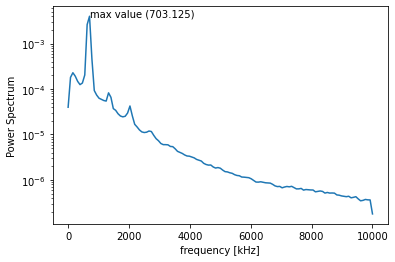


Velocity:  5.477203112000001
Max Frequency value:  859.375


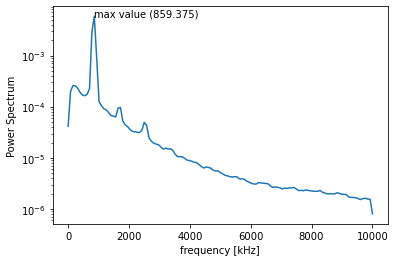


Velocity:  6.51026222
Max Frequency value:  1015.625


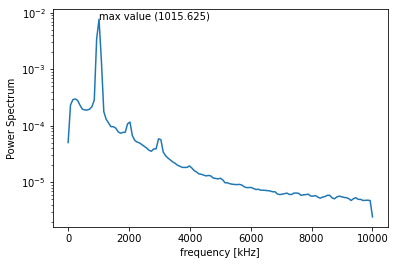


Velocity:  7.478241464
Max Frequency value:  1171.875


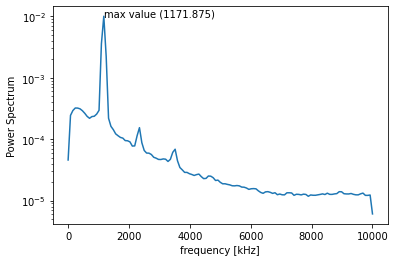


Velocity:  8.518540256
Max Frequency value:  1328.125


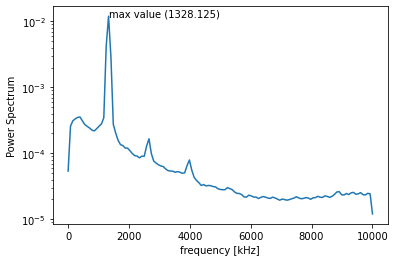


Velocity:  9.4777168
Max Frequency value:  1484.375


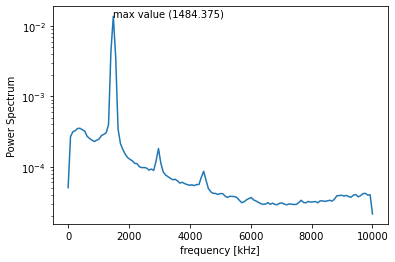


Velocity:  10.454576036
Max Frequency value:  1640.625


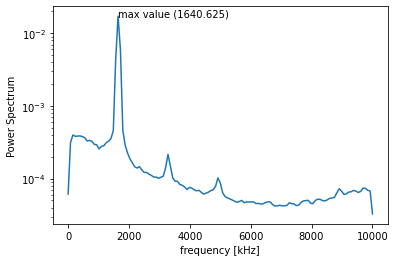


Velocity:  11.52067318
Max Frequency value:  1796.875


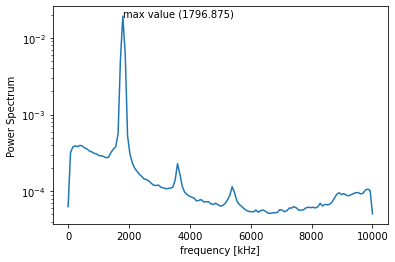


Velocity:  12.418806219999999
Max Frequency value:  1953.125


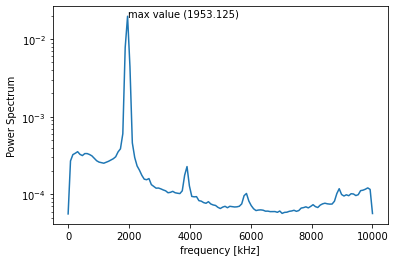


Velocity:  13.514944188
Max Frequency value:  2109.375


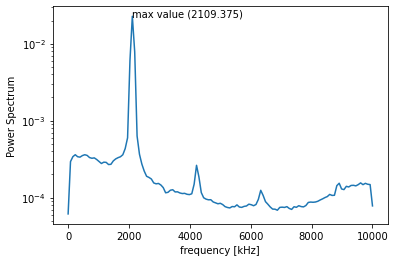


Velocity:  14.557055048
Max Frequency value:  2265.625


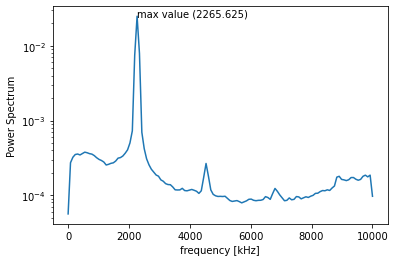


Velocity:  15.434508183999998
Max Frequency value:  2421.875


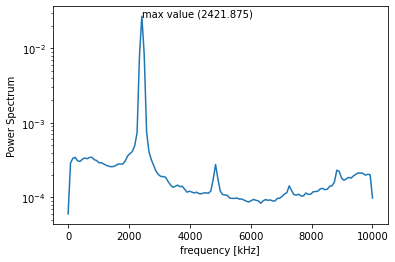

In [7]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_yminus1.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

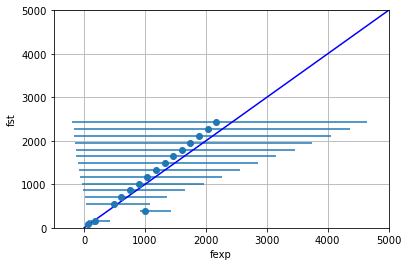

In [8]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.6103749239999999
Max Frequency value:  78.125


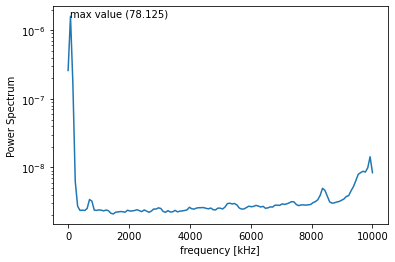


Velocity:  1.502230136
Max Frequency value:  156.25


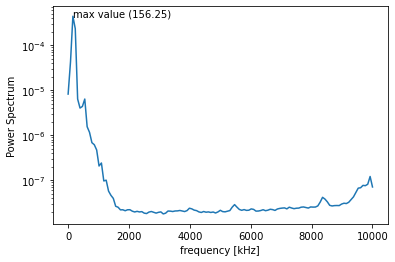


Velocity:  2.519994016
Max Frequency value:  312.5


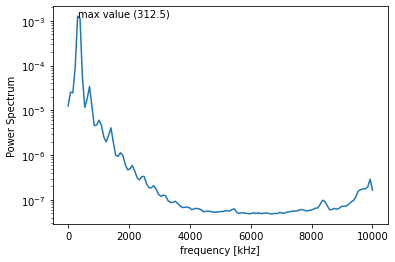


Velocity:  3.5708474599999995
Max Frequency value:  546.875


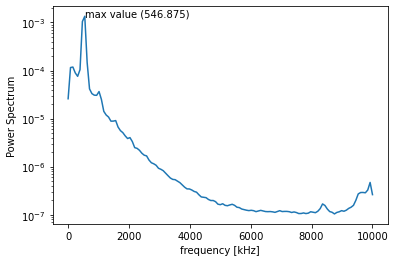


Velocity:  4.42191826
Max Frequency value:  625.0


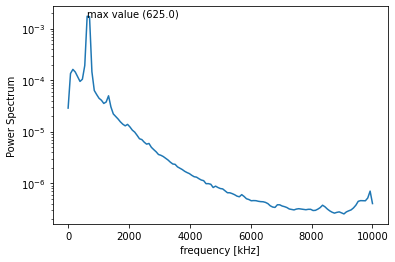


Velocity:  5.4744721279999995
Max Frequency value:  859.375


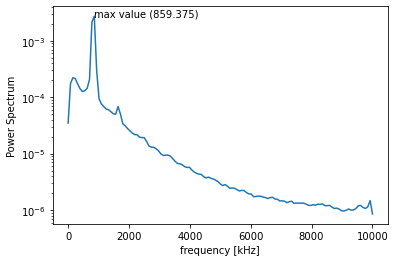


Velocity:  6.50914578
Max Frequency value:  1015.625


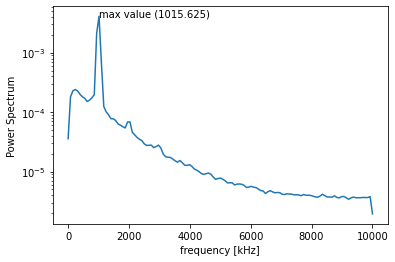


Velocity:  7.4636676280000005
Max Frequency value:  1171.875


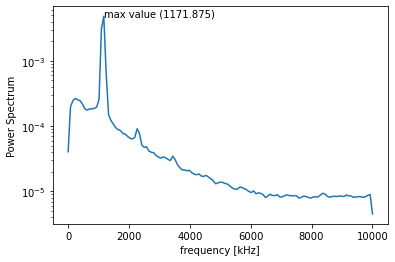


Velocity:  8.500247816
Max Frequency value:  1328.125


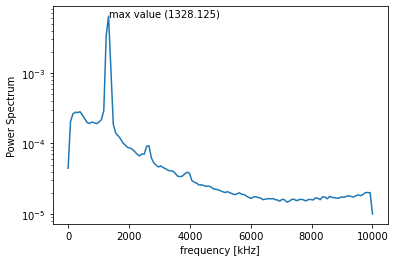


Velocity:  9.458393800000001
Max Frequency value:  1484.375


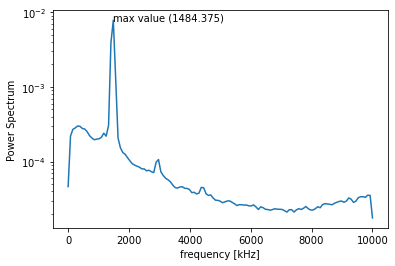


Velocity:  10.500959824
Max Frequency value:  1640.625


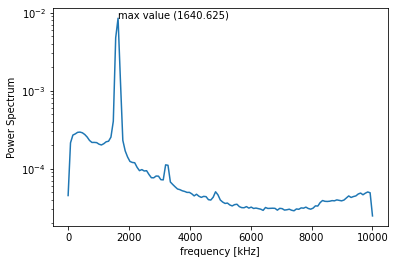


Velocity:  11.500594436000002
Max Frequency value:  1796.875


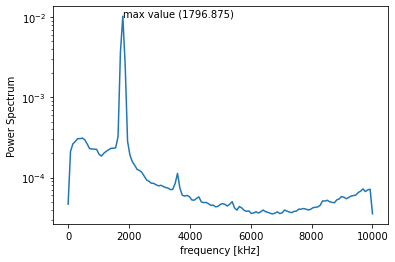


Velocity:  12.404893659999999
Max Frequency value:  1953.125


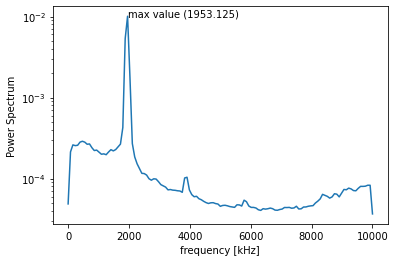


Velocity:  13.45134146
Max Frequency value:  2109.375


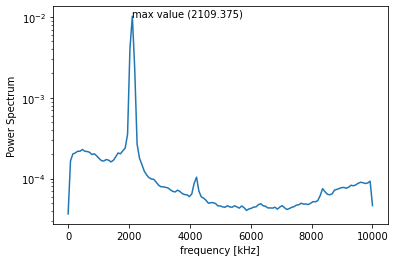


Velocity:  14.492868336
Max Frequency value:  2265.625


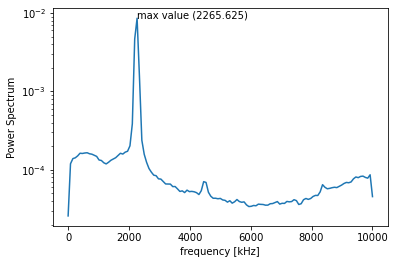


Velocity:  15.465442159999998
Max Frequency value:  2421.875


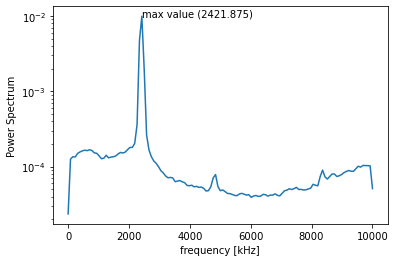

In [9]:
df2 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y0.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

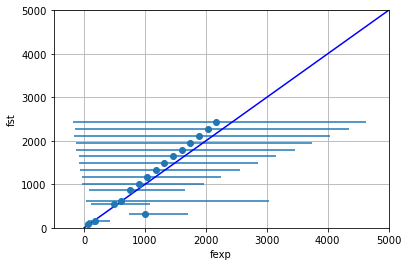

In [10]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.625352396
Max Frequency value:  78.125


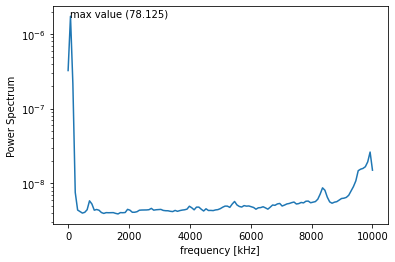


Velocity:  1.480459556
Max Frequency value:  156.25


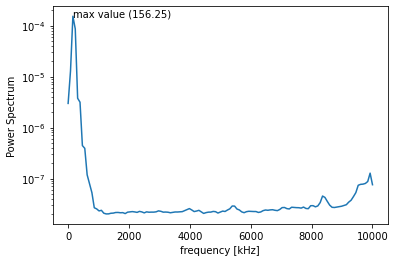


Velocity:  2.5161637679999997
Max Frequency value:  390.625


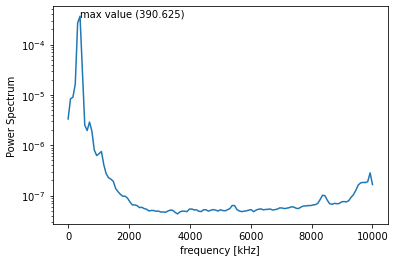


Velocity:  3.5783018440000003
Max Frequency value:  546.875


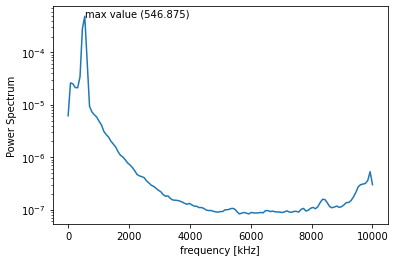


Velocity:  4.42750046
Max Frequency value:  625.0


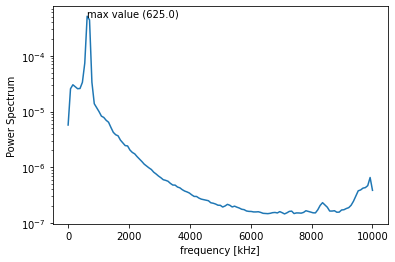


Velocity:  5.493855244000001
Max Frequency value:  859.375


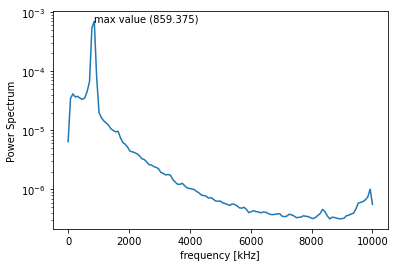


Velocity:  6.533312412
Max Frequency value:  1015.625


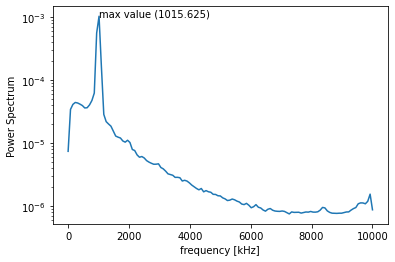


Velocity:  7.485996428000001
Max Frequency value:  1171.875


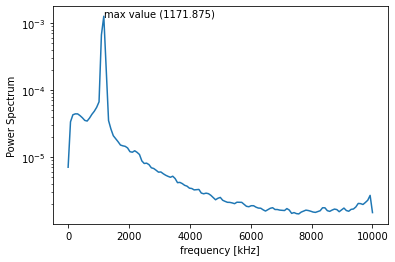


Velocity:  8.497680004000001
Max Frequency value:  1328.125


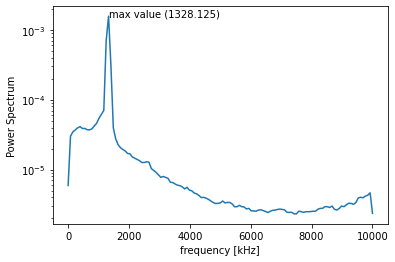


Velocity:  9.444635823999999
Max Frequency value:  1484.375


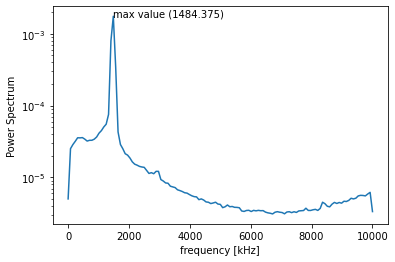


Velocity:  10.505271
Max Frequency value:  1640.625


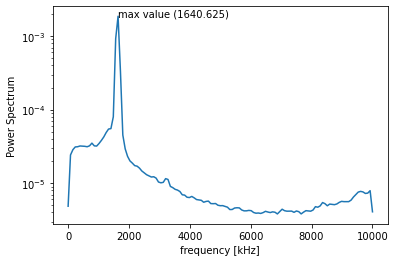


Velocity:  11.572192591999999
Max Frequency value:  1796.875


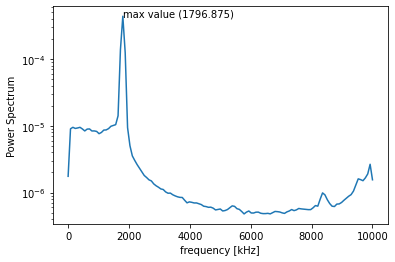


Velocity:  12.451414856000001
Max Frequency value:  1953.125


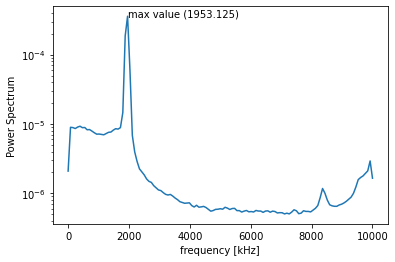


Velocity:  13.46946214
Max Frequency value:  2109.375


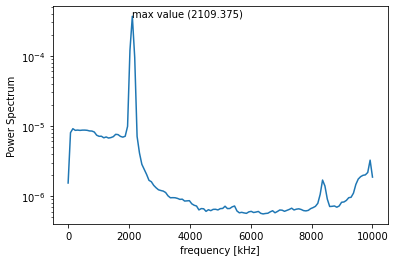


Velocity:  14.504410608
Max Frequency value:  2265.625


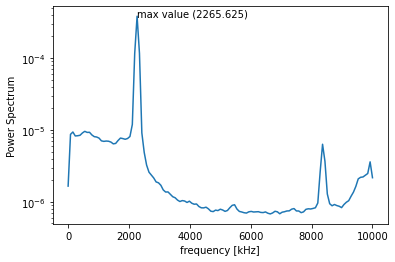


Velocity:  15.495251108
Max Frequency value:  2421.875


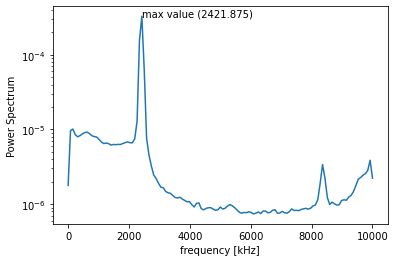

In [11]:
df3 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y1.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

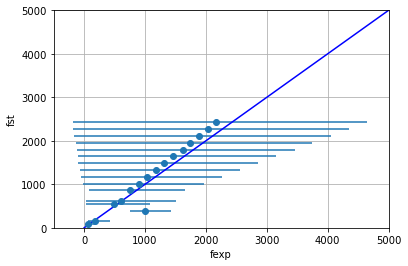

In [12]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.601881392
Max Frequency value:  78.125


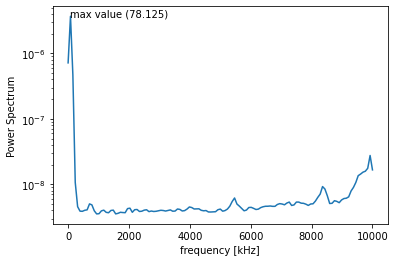


Velocity:  1.4391942160000002
Max Frequency value:  156.25


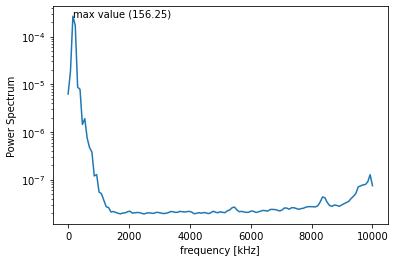


Velocity:  2.5097657079999998
Max Frequency value:  390.625


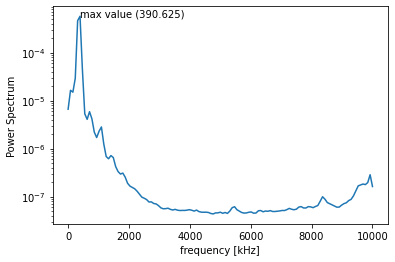


Velocity:  3.5517305720000003
Max Frequency value:  546.875


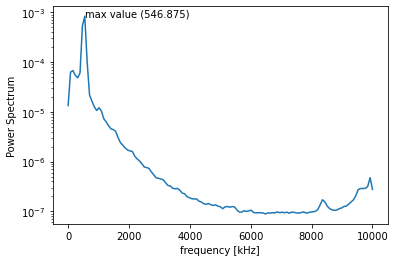


Velocity:  4.495680592
Max Frequency value:  625.0


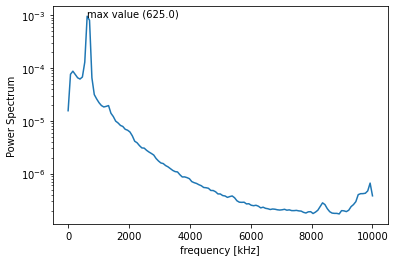


Velocity:  5.528731112
Max Frequency value:  859.375


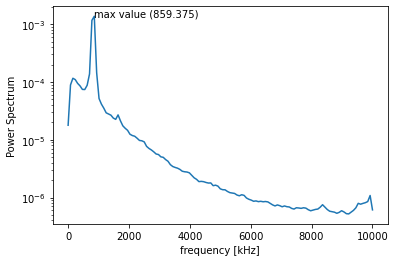


Velocity:  6.580357476
Max Frequency value:  1015.625


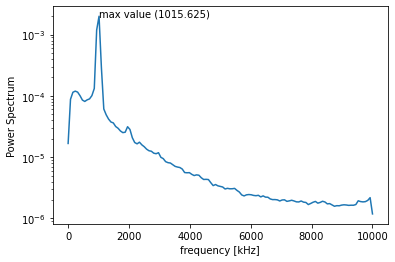


Velocity:  7.46816774
Max Frequency value:  1171.875


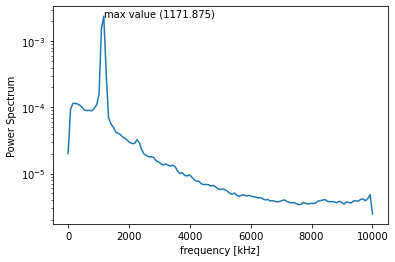


Velocity:  8.531499548000001
Max Frequency value:  1328.125


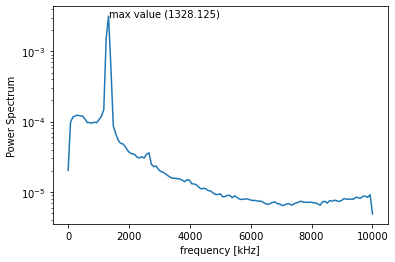


Velocity:  9.471207096
Max Frequency value:  1484.375


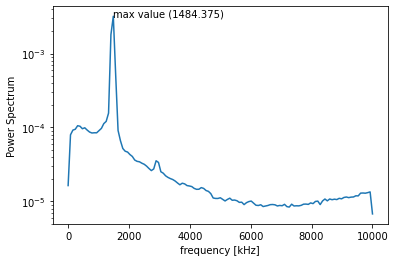


Velocity:  10.521227504
Max Frequency value:  1640.625


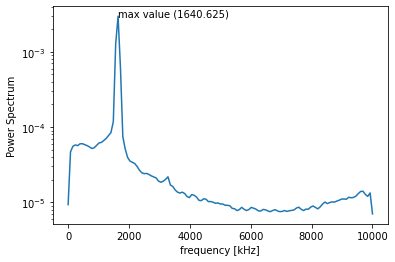


Velocity:  11.498997068000001
Max Frequency value:  1796.875


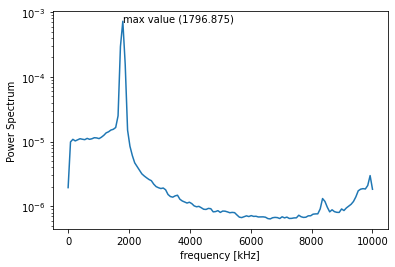


Velocity:  12.43447932
Max Frequency value:  1953.125


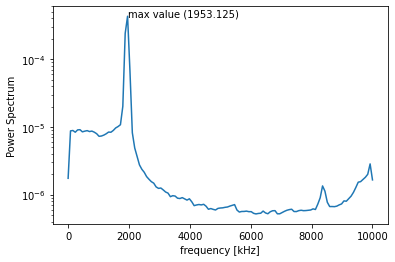


Velocity:  13.507790384
Max Frequency value:  2109.375


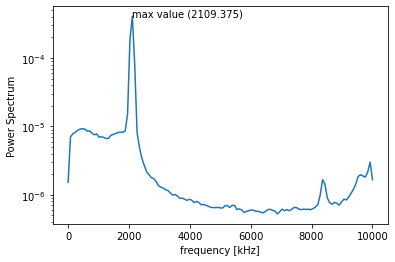


Velocity:  14.5218786
Max Frequency value:  2265.625


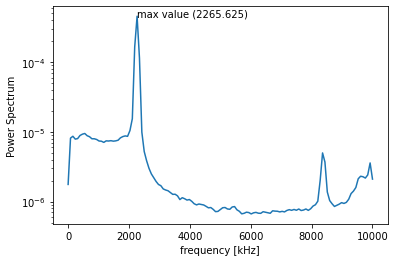


Velocity:  15.494933351999999
Max Frequency value:  2421.875


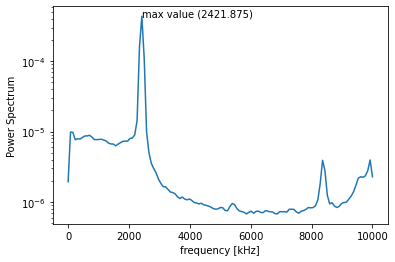

In [13]:
df4 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y2.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

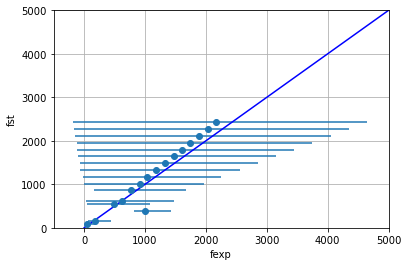

In [14]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.601606576
Max Frequency value:  78.125


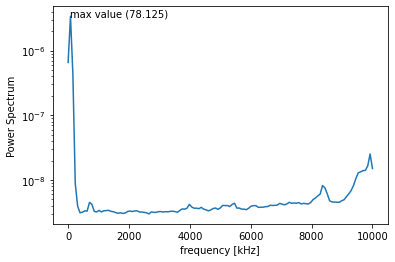


Velocity:  1.4498089840000001
Max Frequency value:  156.25


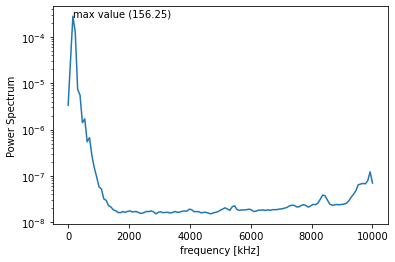


Velocity:  2.4700719720000004
Max Frequency value:  390.625


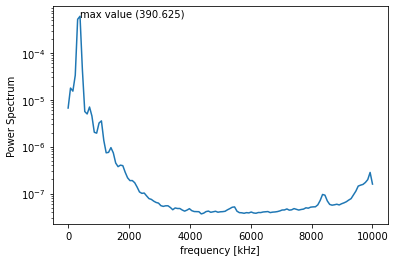


Velocity:  3.5650677359999996
Max Frequency value:  546.875


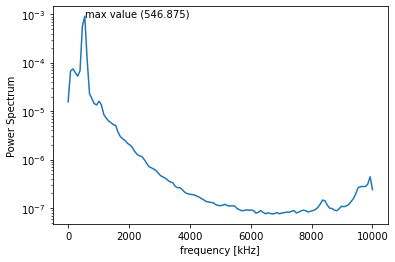


Velocity:  4.4904161479999996
Max Frequency value:  625.0


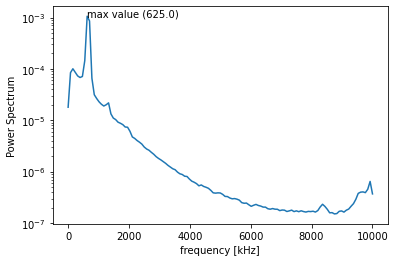


Velocity:  5.51383952
Max Frequency value:  859.375


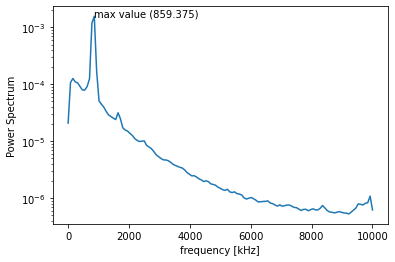


Velocity:  6.53963318
Max Frequency value:  1015.625


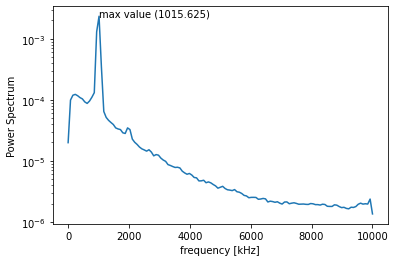


Velocity:  7.484639524
Max Frequency value:  1171.875


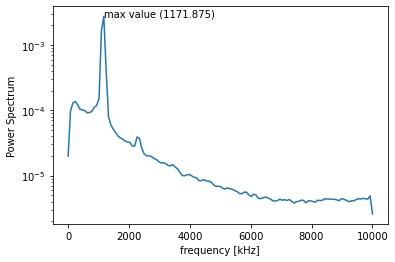


Velocity:  8.52689638
Max Frequency value:  1328.125


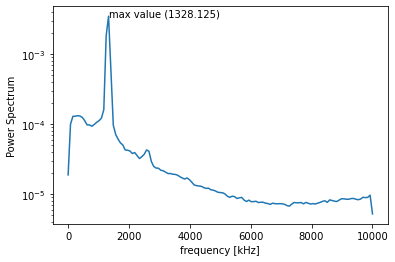


Velocity:  9.47307928
Max Frequency value:  1484.375


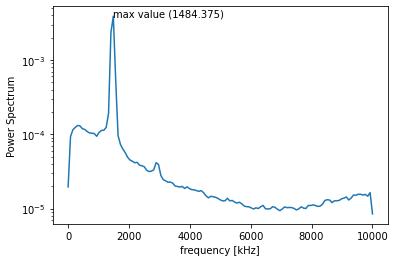


Velocity:  10.467166044
Max Frequency value:  1640.625


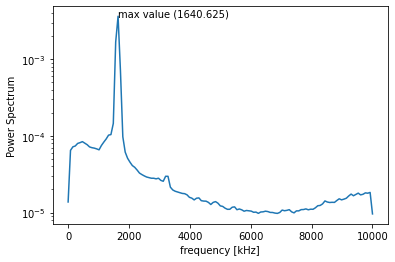


Velocity:  11.52483836
Max Frequency value:  1796.875


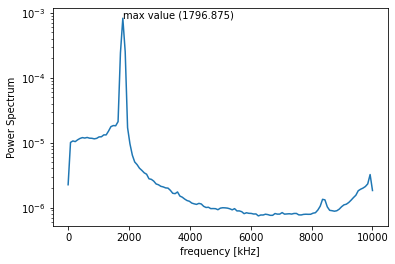


Velocity:  12.421416972
Max Frequency value:  1953.125


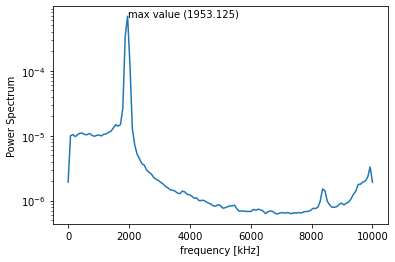


Velocity:  13.483975860000001
Max Frequency value:  2109.375


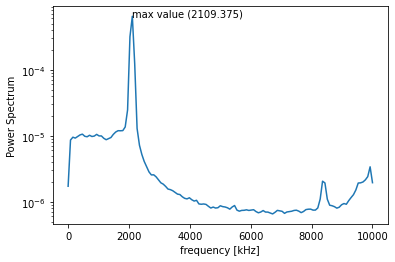


Velocity:  14.549781012
Max Frequency value:  2265.625


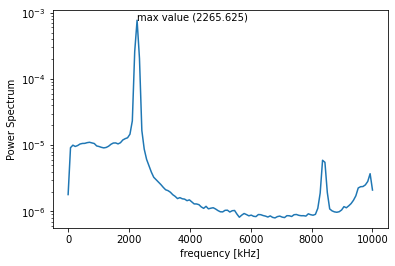


Velocity:  15.447261363999997
Max Frequency value:  2421.875


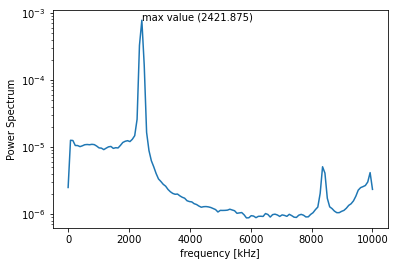

In [15]:
df5 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y3.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

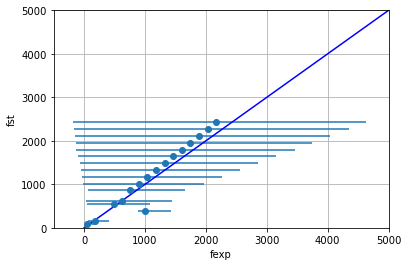

In [16]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.6217969640000001
Max Frequency value:  78.125


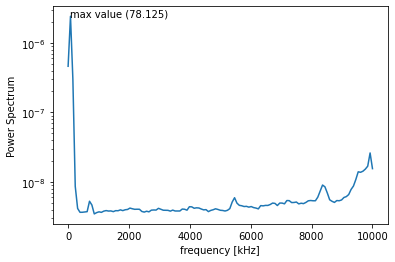


Velocity:  1.463901892
Max Frequency value:  156.25


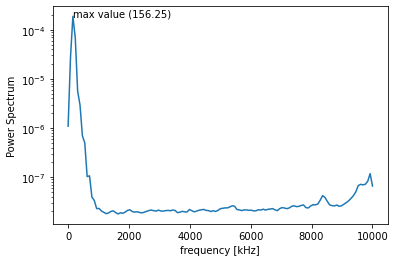


Velocity:  2.5311841800000003
Max Frequency value:  390.625


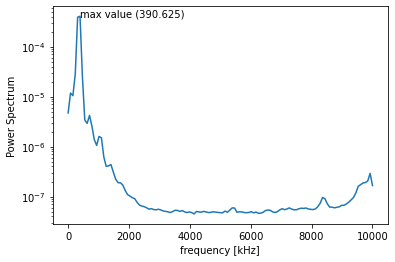


Velocity:  3.5342797559999997
Max Frequency value:  546.875


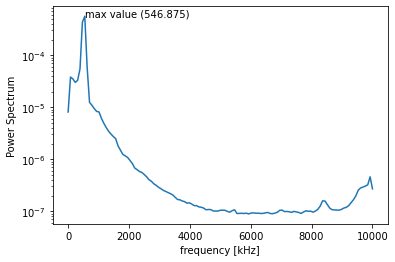


Velocity:  4.51037466
Max Frequency value:  703.125


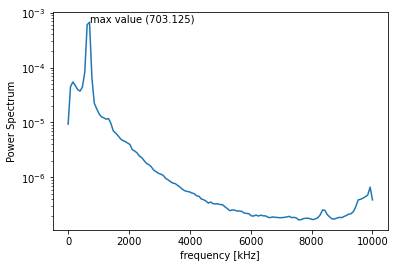


Velocity:  5.541183712
Max Frequency value:  859.375


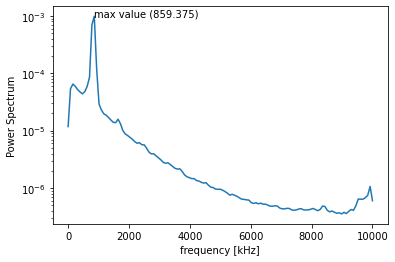


Velocity:  6.523118456
Max Frequency value:  1015.625


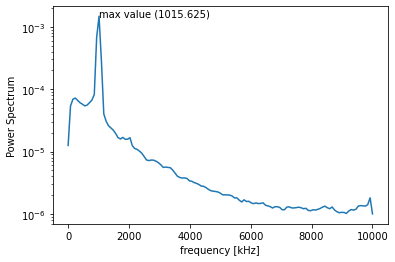


Velocity:  7.480628928000001
Max Frequency value:  1171.875


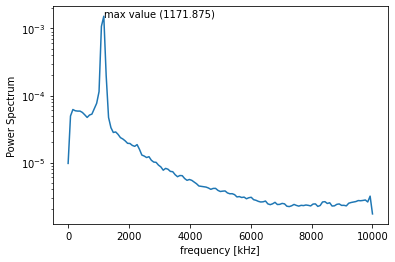


Velocity:  8.501759304
Max Frequency value:  1328.125


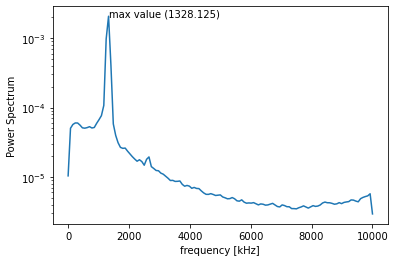


Velocity:  9.413358328
Max Frequency value:  1484.375


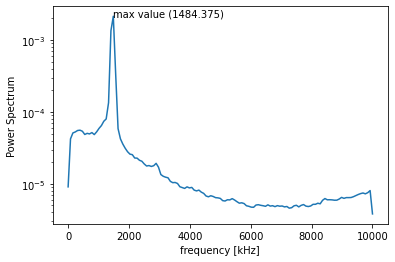


Velocity:  10.45966872
Max Frequency value:  1640.625


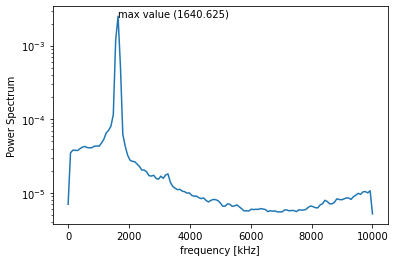


Velocity:  11.520046256
Max Frequency value:  1796.875


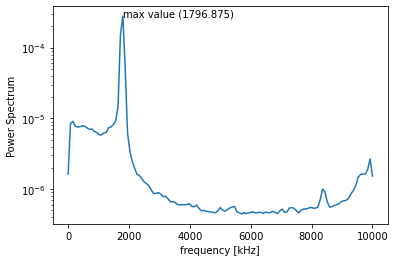


Velocity:  12.429901916
Max Frequency value:  1953.125


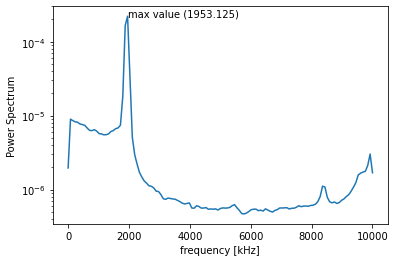


Velocity:  13.435127316
Max Frequency value:  2109.375


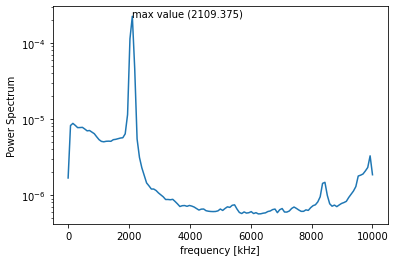


Velocity:  14.542695912000001
Max Frequency value:  2265.625


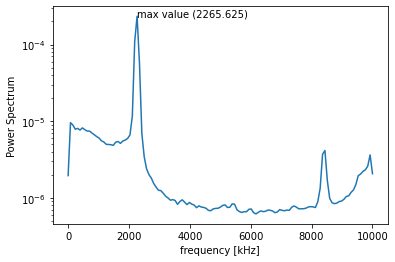


Velocity:  15.44453038
Max Frequency value:  2421.875


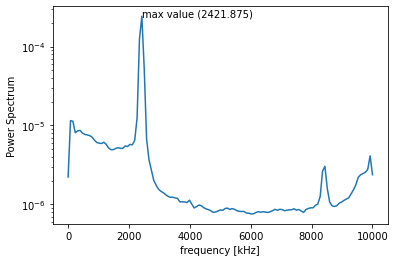

In [17]:
df6 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y4.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

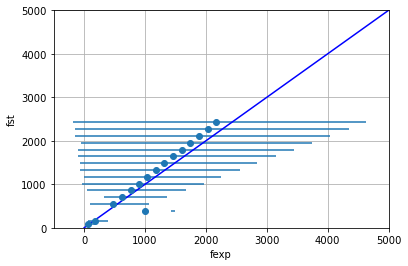

In [18]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.6104092760000001
Max Frequency value:  78.125


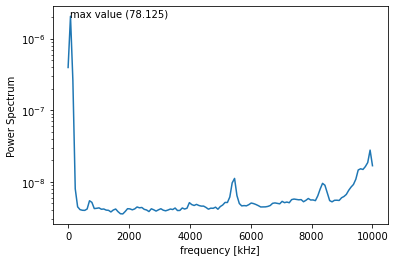


Velocity:  1.4463995479999998
Max Frequency value:  156.25


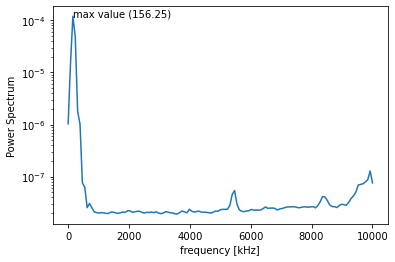


Velocity:  2.49833508
Max Frequency value:  312.5


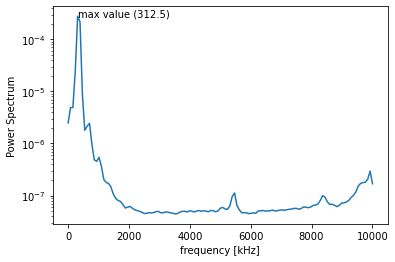


Velocity:  3.549257228
Max Frequency value:  546.875


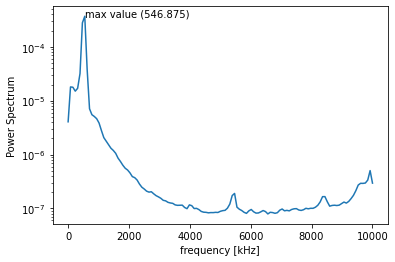


Velocity:  4.480170664
Max Frequency value:  703.125


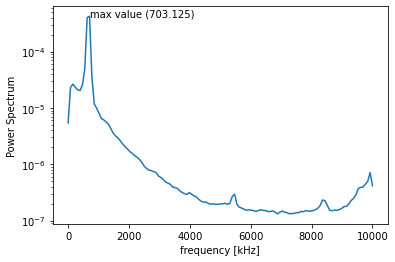


Velocity:  5.533360044
Max Frequency value:  859.375


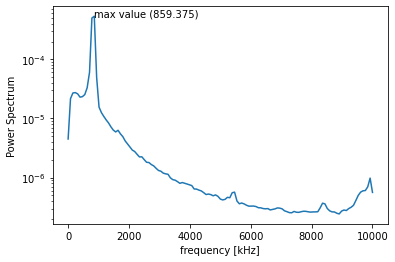


Velocity:  6.536489972
Max Frequency value:  1015.625


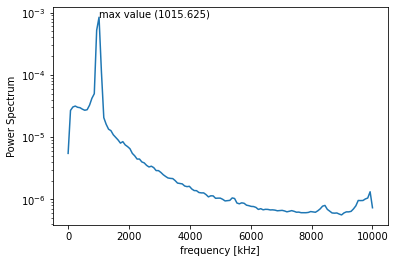


Velocity:  7.429916788
Max Frequency value:  1171.875


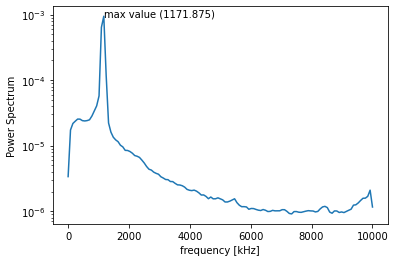


Velocity:  8.534221944
Max Frequency value:  1328.125


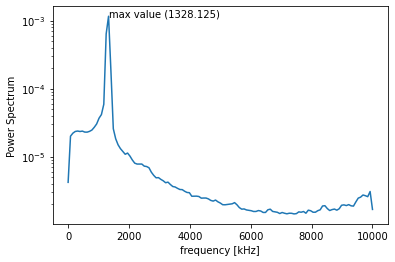


Velocity:  9.515649995999999
Max Frequency value:  1484.375


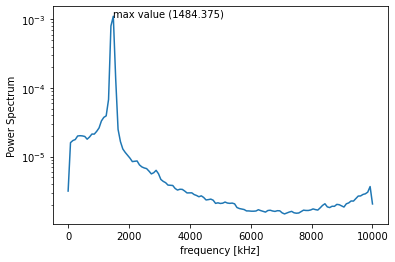


Velocity:  10.444072912
Max Frequency value:  1640.625


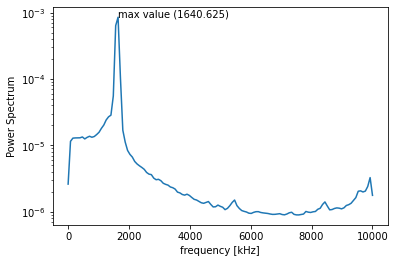


Velocity:  11.539798656000002
Max Frequency value:  1796.875


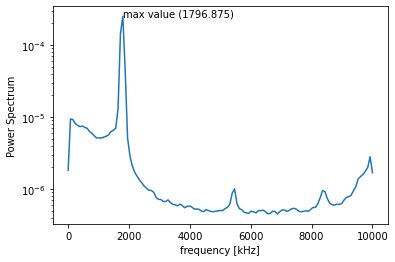


Velocity:  12.539785376000001
Max Frequency value:  1953.125


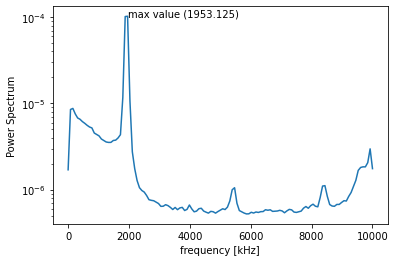


Velocity:  13.533691791999999
Max Frequency value:  2109.375


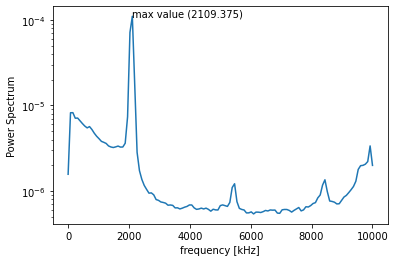


Velocity:  14.525434032000001
Max Frequency value:  2265.625


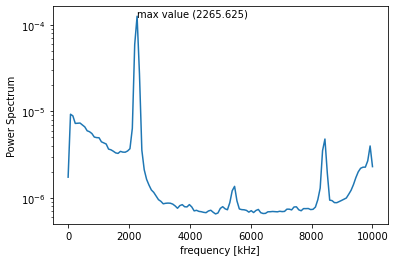


Velocity:  15.472767723999999
Max Frequency value:  2421.875


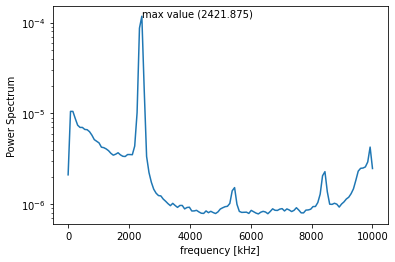

In [19]:
df7 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y5.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

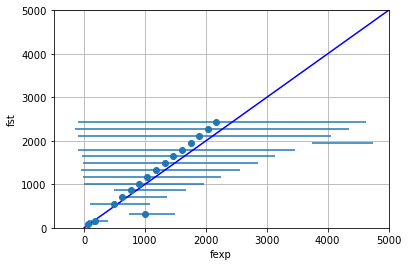

In [20]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.590648288
Max Frequency value:  78.125


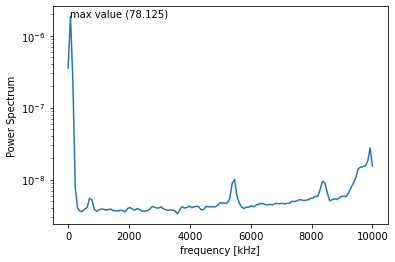


Velocity:  1.444853708
Max Frequency value:  156.25


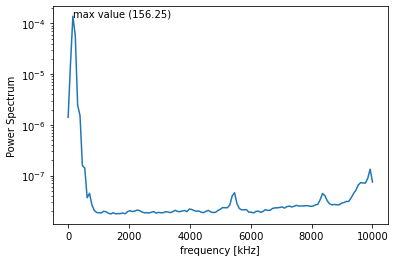


Velocity:  2.477672352
Max Frequency value:  312.5


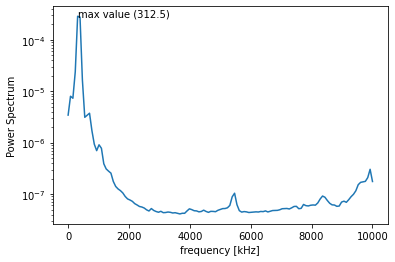


Velocity:  3.544903112
Max Frequency value:  546.875


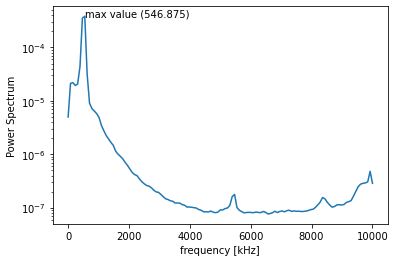


Velocity:  4.4889390119999995
Max Frequency value:  625.0


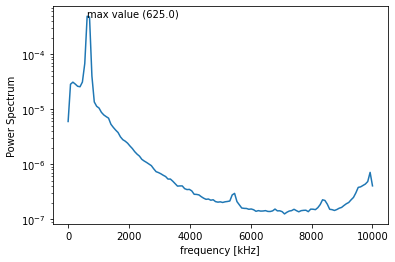


Velocity:  5.487336952000001
Max Frequency value:  859.375


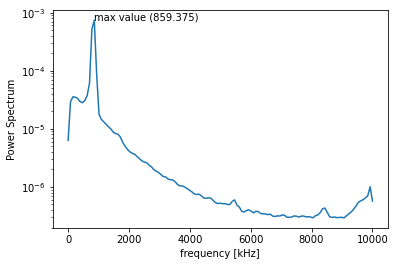


Velocity:  6.516153588000001
Max Frequency value:  1015.625


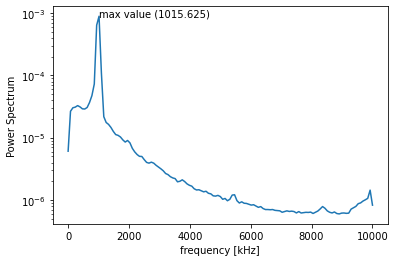


Velocity:  7.416639739999999
Max Frequency value:  1171.875


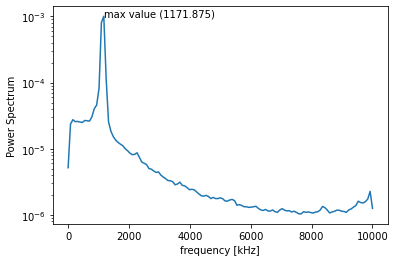


Velocity:  8.528596804000001
Max Frequency value:  1328.125


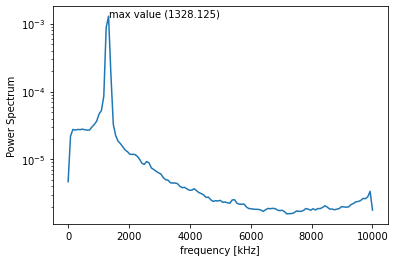


Velocity:  9.495854655999999
Max Frequency value:  1406.25


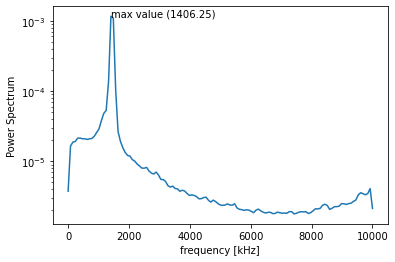


Velocity:  10.44098982
Max Frequency value:  1640.625


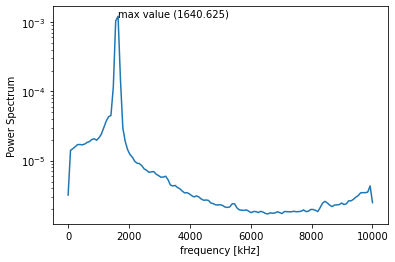


Velocity:  11.515528968
Max Frequency value:  1796.875


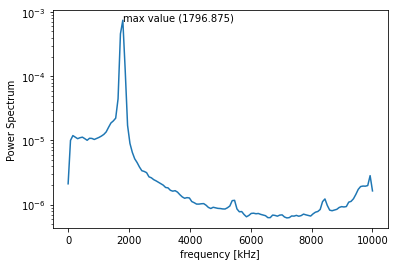


Velocity:  12.445437608
Max Frequency value:  1953.125


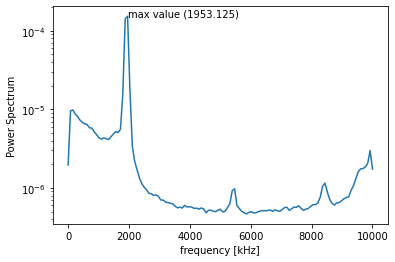


Velocity:  13.438553928000001
Max Frequency value:  2109.375


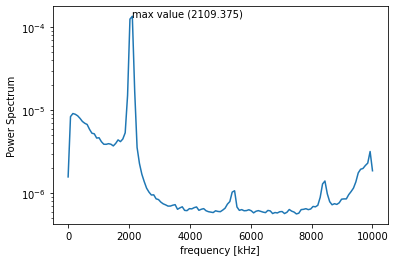


Velocity:  14.473888856000002
Max Frequency value:  2265.625


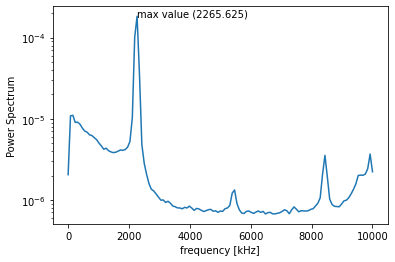


Velocity:  15.487229916
Max Frequency value:  2343.75


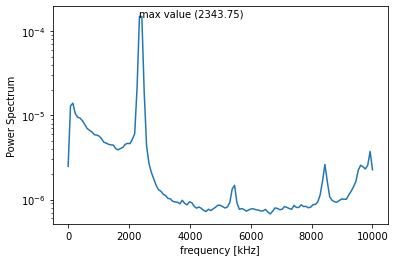

In [21]:
df8 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y6.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

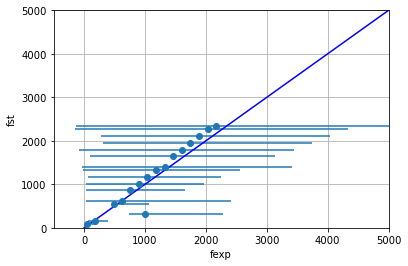

In [22]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.6142567000000001
Max Frequency value:  78.125


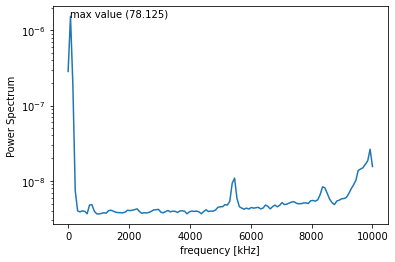


Velocity:  1.450839544
Max Frequency value:  156.25


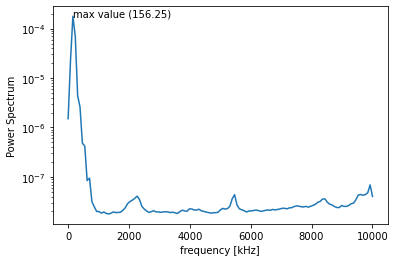


Velocity:  2.487110564
Max Frequency value:  312.5


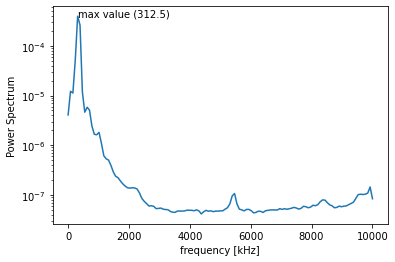


Velocity:  3.548939472
Max Frequency value:  468.75


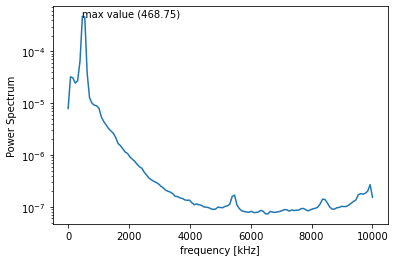


Velocity:  4.465811528
Max Frequency value:  625.0


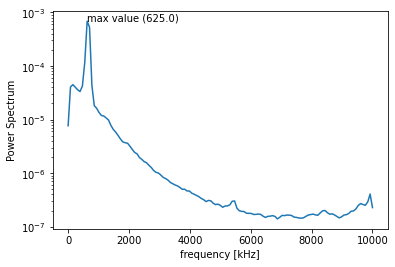


Velocity:  5.507793568
Max Frequency value:  859.375


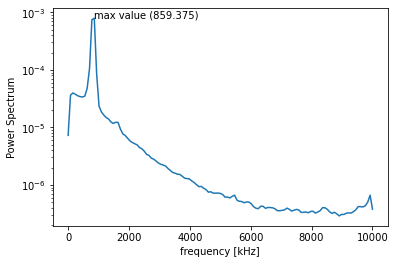


Velocity:  6.524312188000001
Max Frequency value:  1015.625


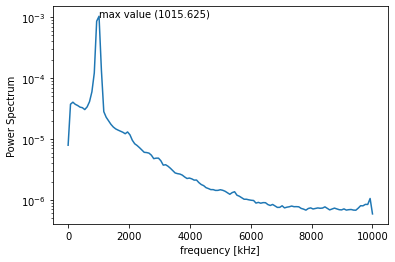


Velocity:  7.5264974360000005
Max Frequency value:  1093.75


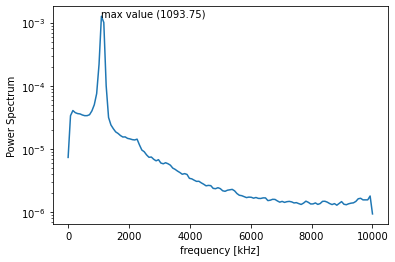


Velocity:  8.544149672
Max Frequency value:  1328.125


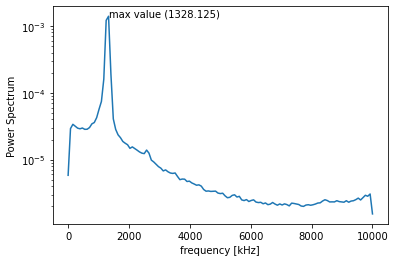


Velocity:  9.408488932
Max Frequency value:  1484.375


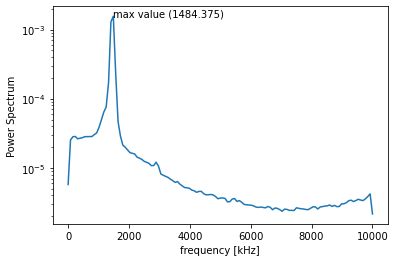


Velocity:  10.54340172
Max Frequency value:  1562.5


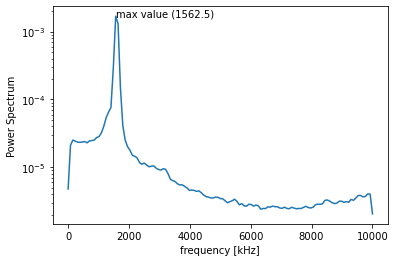


Velocity:  11.510985916000001
Max Frequency value:  1796.875


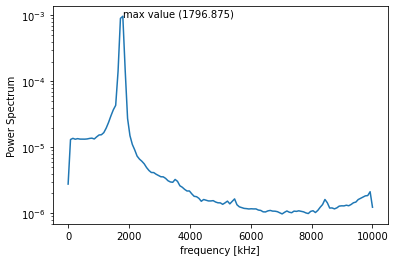


Velocity:  12.500632684
Max Frequency value:  1953.125


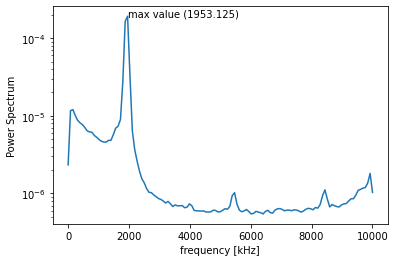


Velocity:  13.4427964
Max Frequency value:  2031.25


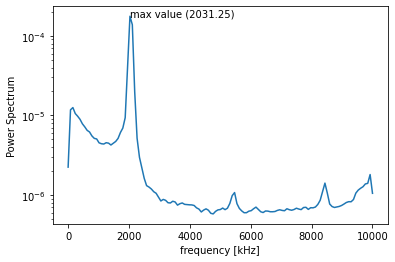


Velocity:  14.547024263999997
Max Frequency value:  2265.625


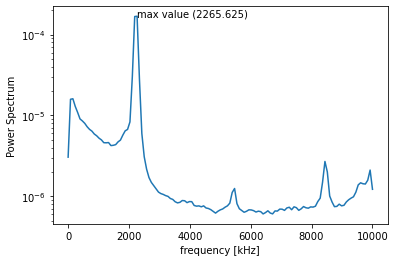


Velocity:  15.445122952
Max Frequency value:  2343.75


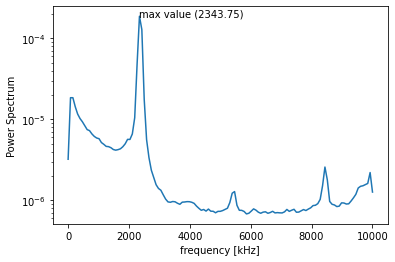

In [23]:
df9 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y7.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

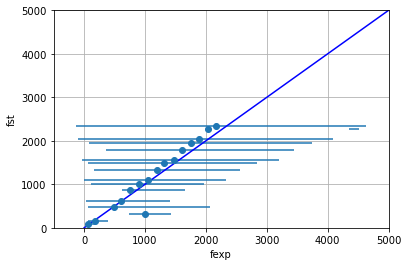

In [24]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  0.6119035880000001
Max Frequency value:  78.125


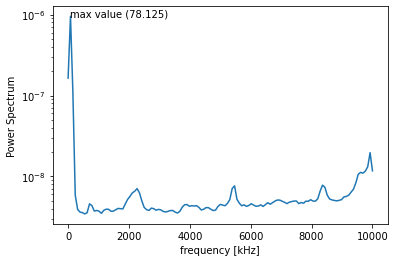


Velocity:  1.4430759920000003
Max Frequency value:  156.25


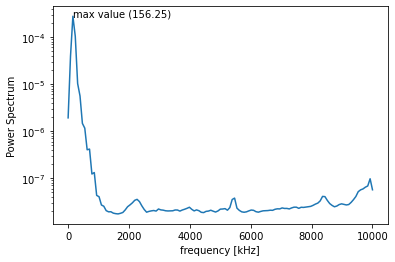


Velocity:  2.470913596
Max Frequency value:  312.5


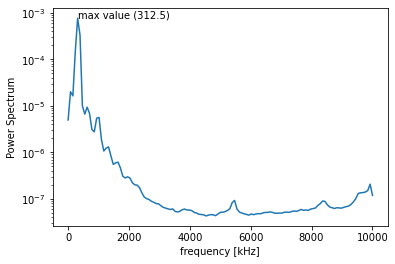


Velocity:  3.5474537479999997
Max Frequency value:  468.75


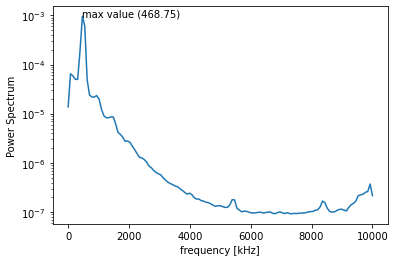


Velocity:  4.494074636
Max Frequency value:  625.0


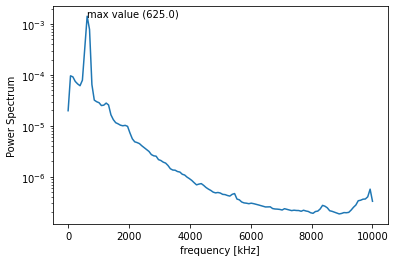


Velocity:  5.509090356
Max Frequency value:  781.25


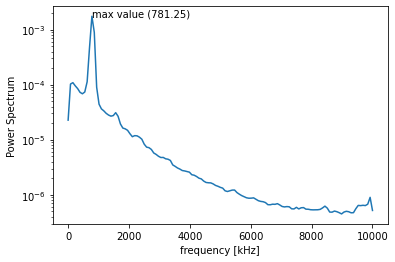


Velocity:  6.506981604
Max Frequency value:  937.5


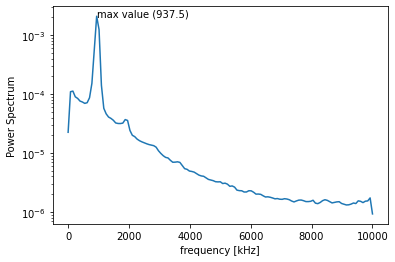


Velocity:  7.529082424
Max Frequency value:  1093.75


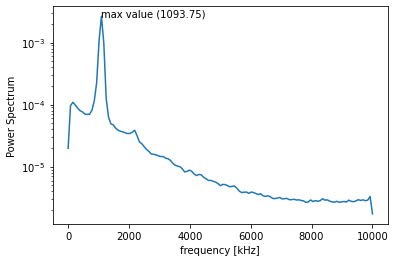


Velocity:  8.549457056
Max Frequency value:  1250.0


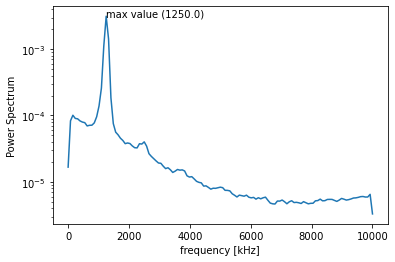


Velocity:  9.42563058
Max Frequency value:  1406.25


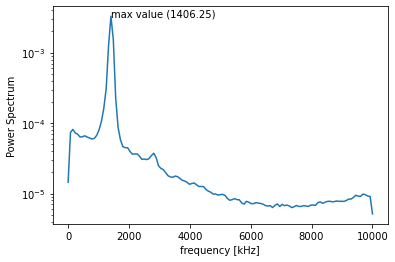


Velocity:  10.469939968000002
Max Frequency value:  1562.5


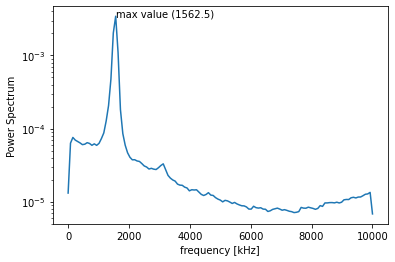


Velocity:  11.546420004
Max Frequency value:  1718.75


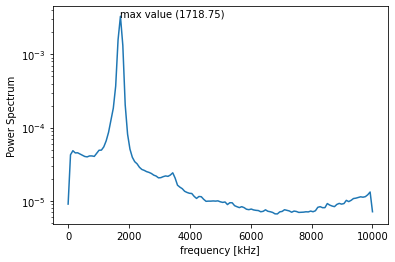


Velocity:  12.48076864
Max Frequency value:  1875.0


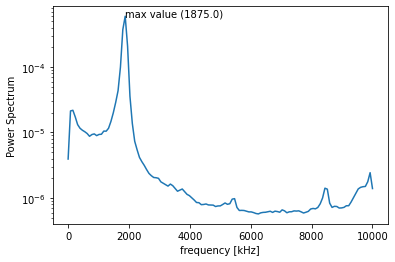


Velocity:  13.503479208
Max Frequency value:  2031.25


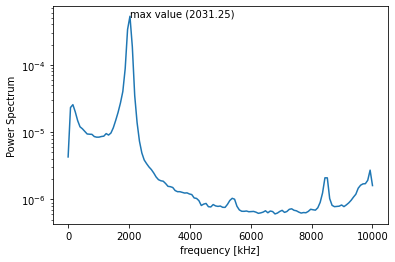


Velocity:  14.537525936000002
Max Frequency value:  2187.5


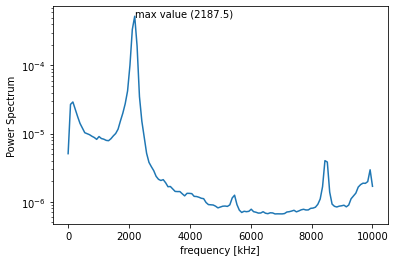


Velocity:  15.441078004
Max Frequency value:  2343.75


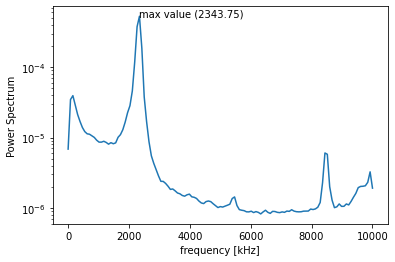

In [25]:
df10 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y8.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

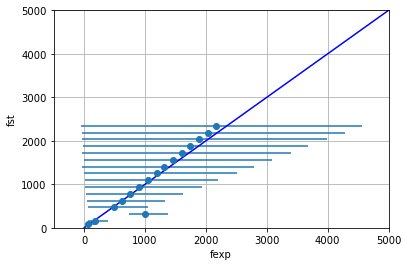

In [26]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  0.596196136
Max Frequency value:  78.125


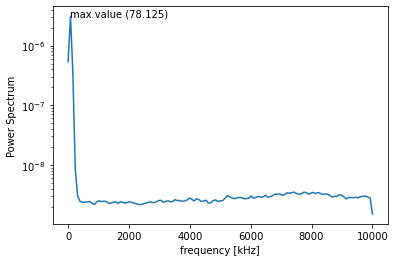


Velocity:  1.4427925879999999
Max Frequency value:  156.25


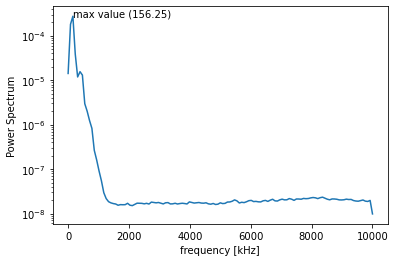


Velocity:  2.4855819
Max Frequency value:  312.5


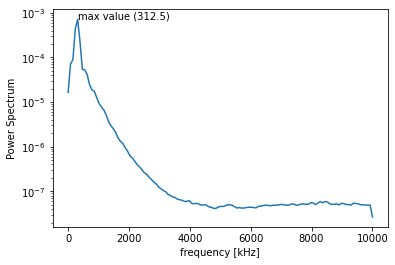


Velocity:  3.5271259520000005
Max Frequency value:  468.75


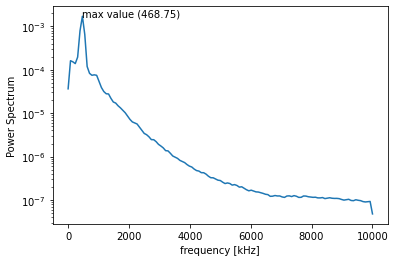


Velocity:  4.48581298
Max Frequency value:  625.0


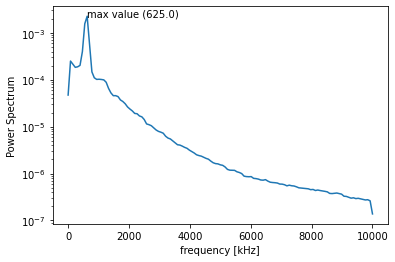


Velocity:  5.518081992
Max Frequency value:  781.25


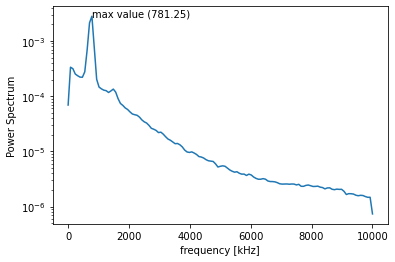


Velocity:  6.48776166
Max Frequency value:  937.5


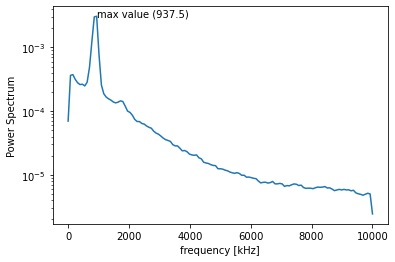


Velocity:  7.49208532
Max Frequency value:  1015.625


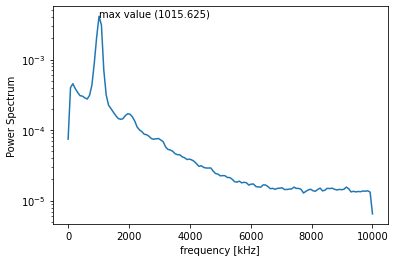


Velocity:  8.497284956
Max Frequency value:  1171.875


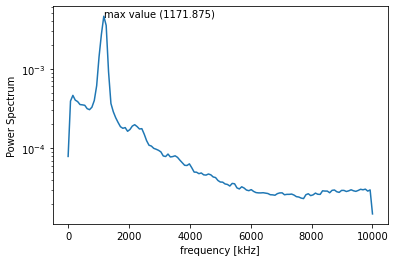


Velocity:  9.479468751999999
Max Frequency value:  1328.125


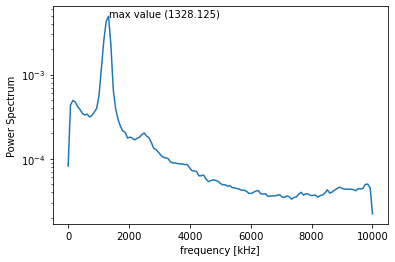


Velocity:  10.519415436
Max Frequency value:  1484.375


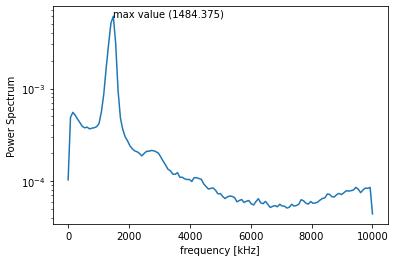


Velocity:  11.464610716000001
Max Frequency value:  1640.625


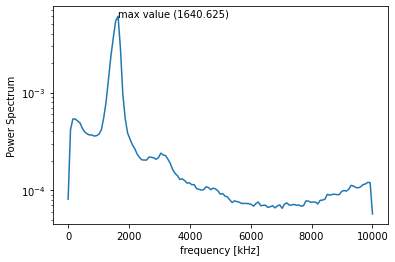


Velocity:  12.416762276
Max Frequency value:  1718.75


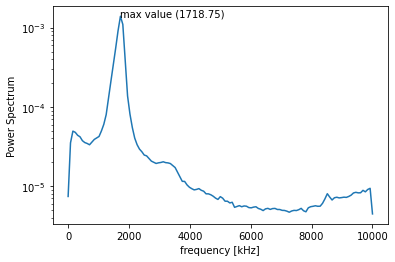


Velocity:  13.505308452
Max Frequency value:  1875.0


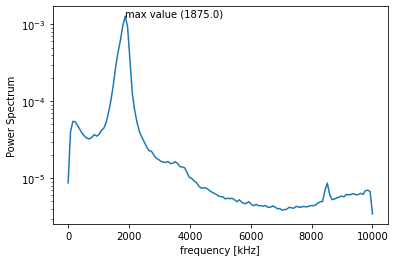


Velocity:  14.511968048000002
Max Frequency value:  2031.25


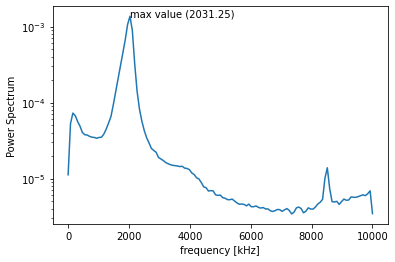


Velocity:  15.443997924
Max Frequency value:  2187.5


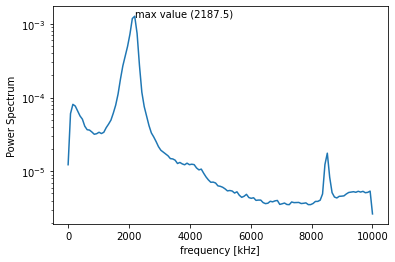

In [27]:
df11 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y9.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

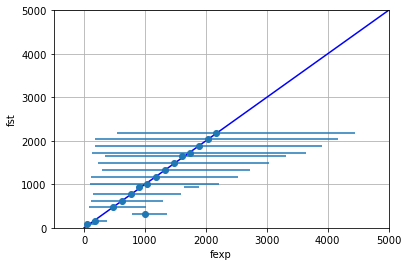

In [28]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

Velocity:  0.560263944
Max Frequency value:  78.125


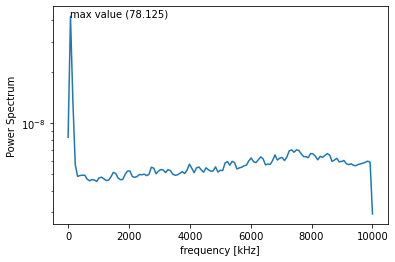


Velocity:  1.4573836
Max Frequency value:  78.125


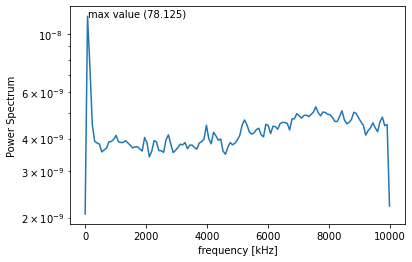


Velocity:  2.5025603760000004
Max Frequency value:  156.25


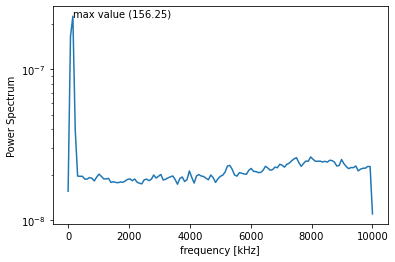


Velocity:  3.5630495559999997
Max Frequency value:  234.375


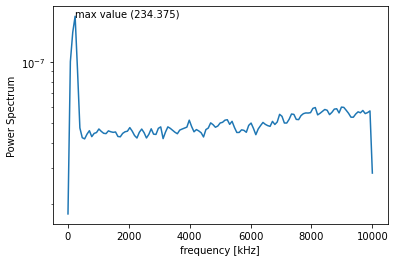


Velocity:  4.48044548
Max Frequency value:  156.25


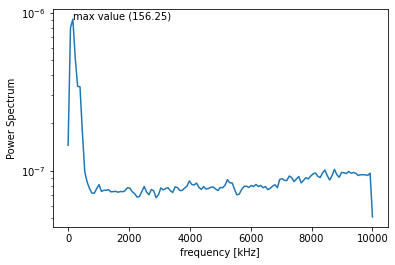


Velocity:  5.48833316
Max Frequency value:  156.25


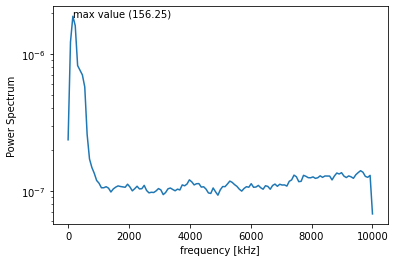


Velocity:  6.533552876
Max Frequency value:  78.125


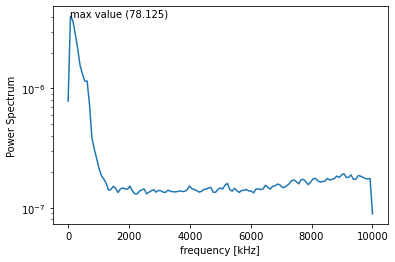


Velocity:  7.531916464
Max Frequency value:  78.125


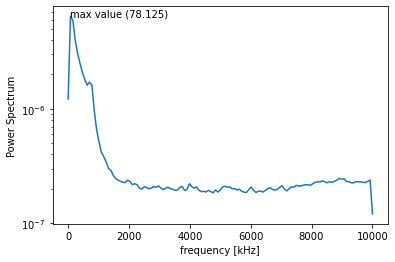


Velocity:  8.50250646
Max Frequency value:  78.125


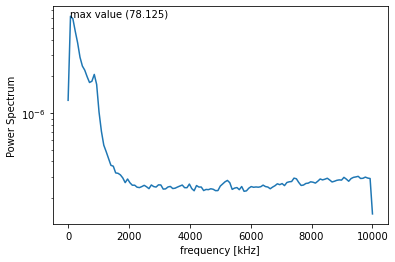


Velocity:  9.470021952
Max Frequency value:  78.125


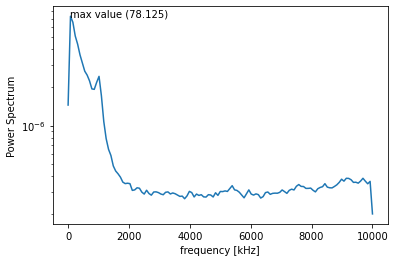


Velocity:  10.512648092
Max Frequency value:  156.25


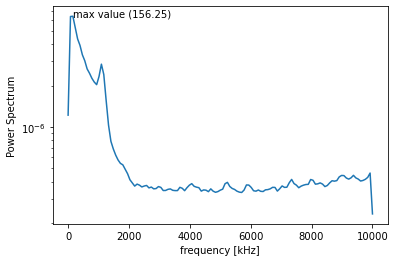


Velocity:  11.501350180000001
Max Frequency value:  156.25


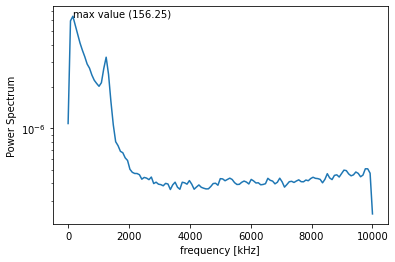


Velocity:  12.483722912
Max Frequency value:  156.25


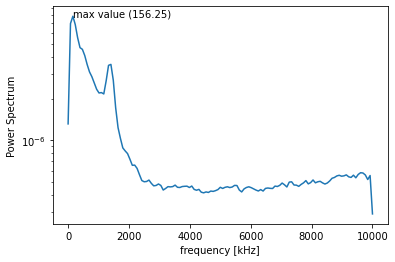


Velocity:  13.490829084
Max Frequency value:  156.25


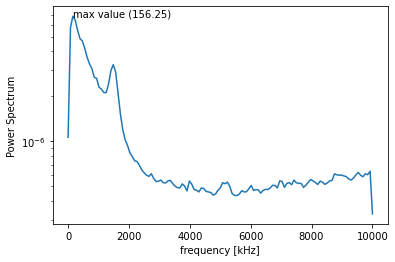


Velocity:  14.489338668
Max Frequency value:  156.25


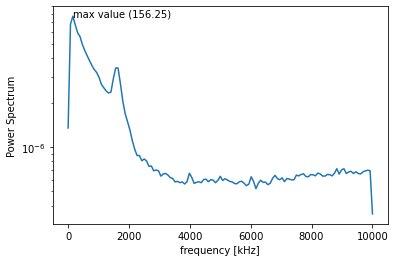


Velocity:  15.449408363999998
Max Frequency value:  156.25


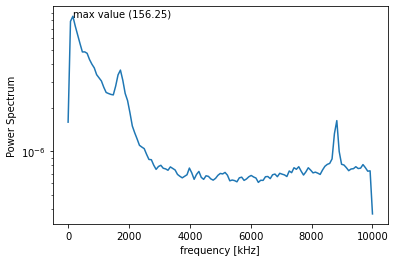

In [29]:
df12 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y10.csv', header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <150:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

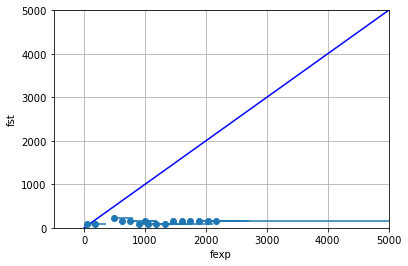

In [30]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')